# Exploring Covid19 data with pandas.

https://github.com/CSSEGISandData/COVID-19
    
https://www.fullstackpython.com/blog/learn-pandas-basic-commands-explore-covid-19-data.html


## Download COVID-19 data:
```bash
git clone https://github.com/CSSEGISandData/COVID-19.git
```


## Import libraries

* pandas
* datetime
* requests
* pathlib
* matplotlib
    

In [1]:
import pandas as pd
import datetime
import requests
from pathlib import Path
import matplotlib.pyplot as plt 
%matplotlib inline 

# Path CSV files

In [2]:
path = "/home/ernesto/proyectos/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"

# Function list files

In [3]:
def ls3(path):
    """
    Return list of filenames from path.
    :param path: Path of directory to list files
    :return filenames 
    """
    return [obj.name for obj in Path(path).iterdir() if obj.is_file()]

In [4]:
ls3(path)

['11-13-2021.csv',
 '06-10-2021.csv',
 '03-01-2022.csv',
 '08-11-2020.csv',
 '07-16-2021.csv',
 '07-06-2021.csv',
 '08-05-2021.csv',
 '01-05-2021.csv',
 '12-29-2021.csv',
 '09-02-2021.csv',
 '06-07-2020.csv',
 '10-26-2020.csv',
 '03-27-2020.csv',
 '07-26-2022.csv',
 '01-14-2021.csv',
 '06-11-2021.csv',
 '06-14-2020.csv',
 '12-12-2021.csv',
 '12-04-2020.csv',
 '09-19-2020.csv',
 '01-24-2020.csv',
 '07-15-2022.csv',
 '03-07-2022.csv',
 '03-23-2022.csv',
 '06-10-2022.csv',
 '05-16-2020.csv',
 '10-04-2022.csv',
 '07-10-2020.csv',
 '11-18-2021.csv',
 '04-16-2022.csv',
 '09-16-2021.csv',
 '01-12-2021.csv',
 '08-26-2020.csv',
 '12-12-2020.csv',
 '04-06-2021.csv',
 '06-08-2021.csv',
 '09-22-2020.csv',
 '11-02-2020.csv',
 '06-23-2022.csv',
 '03-13-2020.csv',
 '04-27-2021.csv',
 '09-20-2022.csv',
 '06-21-2022.csv',
 '04-24-2021.csv',
 '02-23-2022.csv',
 '05-27-2020.csv',
 '07-15-2020.csv',
 '01-31-2020.csv',
 '01-17-2022.csv',
 '06-17-2022.csv',
 '05-18-2020.csv',
 '11-12-2020.csv',
 '02-09-2020

# Function get data

In [5]:
def getData(country="Venezuela",date="11-07-2022",path=path,encoding="ISO-8859-1"):
    """
    Obtiene los datos desde una fecha y para un país, de la ruta definida de archivos csv.
    :param country: País que se quiere generar el dataframe
    :param date: Fecha desde que se va a tomar los datos para el dataframe
    :param path: Ruta donde se encuentran los archivos csv
    :param encoding: Codificación a la que se encuentran los archivos csv.
    :return df: Dataframe con los datos extraídos de los csv desde una fecha dada y para un país.
    """
    # Se obtiene los nombres de los archivos.
    lista = [file for file in ls3(path) if file.split(".")[-1] == "csv"]
    # Se lee los archivos csv y se convierten en varios dataframe en un diccionario ordenados por fecha.
    df = {item.split(".")[0]:pd.read_csv(path+ "/" +item,encoding=encoding) for item in lista}
    # Se lista las fechas
    dates = [item.split(".")[0] for item in lista]
    # Se renombras las columnas de los dataframes.
    for i,date in enumerate(dates):
        if "Country_Region" in list(df[date].columns) or "Province_State" in list(df[date].columns) or "Last_Update" in list(df[date].columns):
            df[date].rename(columns={"Country_Region": 'Country/Region',"Last_Update":"Last Update","Province_State": "Province/State"},inplace=True)
    # Se convierten las fechas en datetime y se ordenan
    dates2 = sorted([datetime.datetime.strptime(date,"%m-%d-%Y") for date in dates])
    # Se ordena los dataframes en una lista
    data = [df[d.strftime("%m-%d-%Y")][df[d.strftime("%m-%d-%Y")]["Country/Region"] == country] for d in dates2 if d >= datetime.datetime.strptime(date,"%m-%d-%Y")]
    #Se concatena los dataframes en uno sólo y se retorna
    data_df = pd.concat(data)
    return data_df 

# Function data process

In [6]:
def DataProcessor(df):
    """
    Se remueve columnas del dataframe, se define el index, se reemplaza los NA y se agrega dos columnas.
    :param df: Dataframe a procesar
    :return df: DataFrame procesado
    """
    # Se obtiene el nombre de una columna a remover
    remove = list(df.columns)[0]
    # Se remueve la lista de columnas
    # ['FIPS', 'Admin2', 'Province/State', 'Country/Region', 'Last Update','Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active','Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio','Incident_Rate', 'Case_Fatality_Ratio']
    df.drop(labels=['FIPS', 'Admin2', 'Province/State','Lat', 'Long_','Combined_Key', remove],axis=1,inplace=True)
    df.drop(labels=[df.columns[-2]],axis=1,inplace=True)
    # Se reemplaza NA por 0.
    df.fillna(0,inplace=True)
    # Se conviernte las fechas que son string a datetime
    df['Last Update']= pd.to_datetime(df['Last Update'])
    # Se define las fechas como indice
    df.set_index("Last Update",inplace=True)
    return df 

# Function do graphs

In [8]:
# Countries
countries = ["Venezuela","Chile"]
# Fecha de extracción de datos
date= "02-20-2020"

In [9]:
def PlotData(df,column,title):
    """
    Gráfica una columna del dataframe
    :param df: Dataframe a gráficar
    :param column: Columna a graficar
    :param title: Título de la gŕafica
    """
    # Se recorre los países de la lista
    for i,country in enumerate(countries):
        if i == 0:
            # Si es el primer país se define el título de la gráfica 
            df[country][column].plot(label=country,figsize=(16,8),title=title)
        else:
            df[country][column].plot(label=country,figsize=(16,8))
    plt.legend();

# Get data

In [10]:
df = getData(country="Venezuela",date=date)
df.head()

,FIPS,Admin2,Province/State,Country/Region,Last Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,Incident_Rate,Case_Fatality_Ratio
3794,NaN,NaN,NaN,Venezuela,2020-07-06 04:33:57,6.4238,-66.5897,7169,65.0,2100.0,5004.0,Venezuela,25.211051,0.906682,NaN,NaN
3796,NaN,NaN,NaN,Venezuela,2020-07-07 04:34:00,6.4238,-66.5897,7411,68.0,2100.0,5243.0,Venezuela,26.062086,0.917555,NaN,NaN
3797,NaN,NaN,NaN,Venezuela,2020-07-08 05:33:48,6.4238,-66.5897,7693,71.0,2100.0,5522.0,Venezuela,27.053789,0.922917,NaN,NaN
3800,NaN,NaN,NaN,Venezuela,2020-07-09 04:34:23,6.4238,-66.5897,8008,75.0,2100.0,5833.0,Venezuela,28.161542,0.936563,NaN,NaN
3800,NaN,NaN,NaN,Venezuela,2020-07-10 04:34:24,6.4238,-66.5897,8372,80.0,2544.0,5748.0,Venezuela,29.441612,0.955566,NaN,NaN


In [11]:
df.columns

Index(['FIPS', 'Admin2', 'Province/State', 'Country/Region', 'Last Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio',
       'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [12]:
# Construcción de los dataframes
df = {country: getData(country=country,date=date) for country in countries}

# Data process

In [13]:
# Procesar los datos
df2 = {country: DataProcessor(df[country]) for country in countries}

# DataFrame

Dataframe: Venezuela

In [14]:
df2["Venezuela"]

,Country/Region,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio,Case_Fatality_Ratio
Last Update,,,,,,,,
2020-07-06 04:33:57,Venezuela,7169,65.0,2100.0,5004.0,25.211051,0.906682,0.000000
2020-07-07 04:34:00,Venezuela,7411,68.0,2100.0,5243.0,26.062086,0.917555,0.000000
2020-07-08 05:33:48,Venezuela,7693,71.0,2100.0,5522.0,27.053789,0.922917,0.000000
2020-07-09 04:34:23,Venezuela,8008,75.0,2100.0,5833.0,28.161542,0.936563,0.000000
2020-07-10 04:34:24,Venezuela,8372,80.0,2544.0,5748.0,29.441612,0.955566,0.000000
...,...,...,...,...,...,...,...,...
2022-11-04 04:22:11,Venezuela,545951,5820.0,0.0,0.0,0.000000,0.000000,1.066030
2022-11-05 04:21:52,Venezuela,545963,5820.0,0.0,0.0,0.000000,0.000000,1.066006
2022-11-06 04:21:24,Venezuela,546047,5821.0,0.0,0.0,0.000000,0.000000,1.066025


# Graphs

## Confirmed

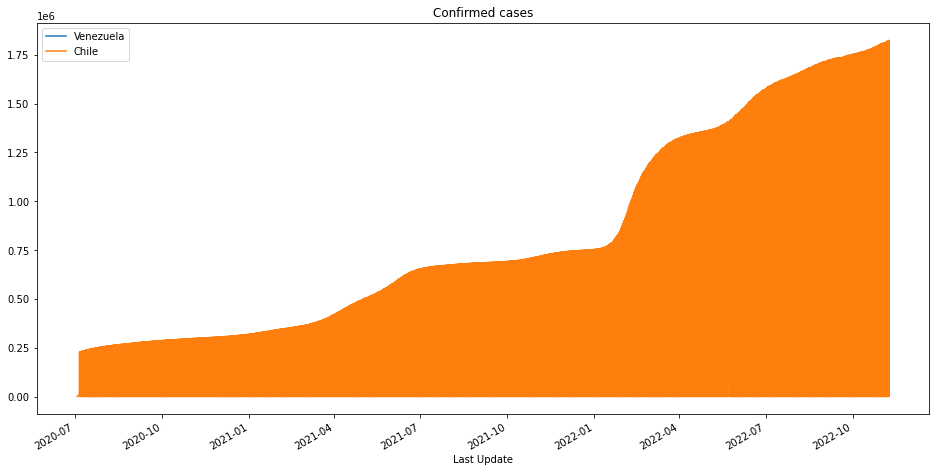

In [15]:

PlotData(df2,"Confirmed","Confirmed cases")

## Deaths

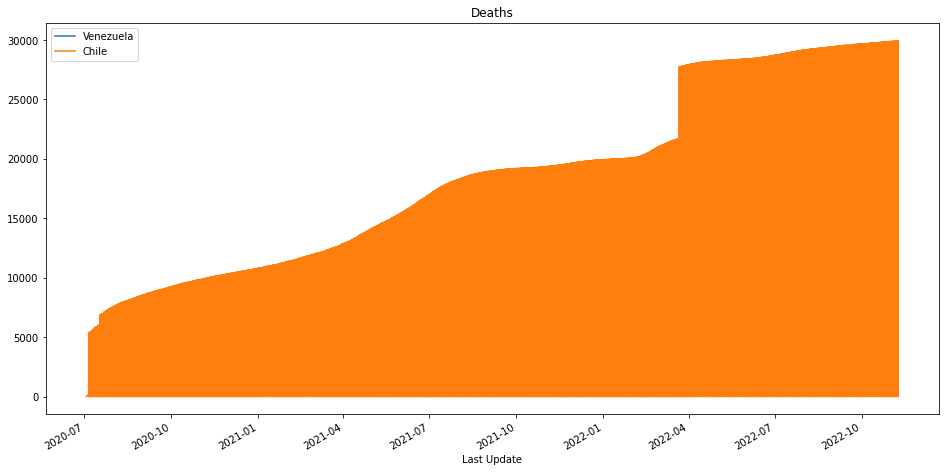

In [17]:
PlotData(df2,"Deaths","Deaths")

## Recovered

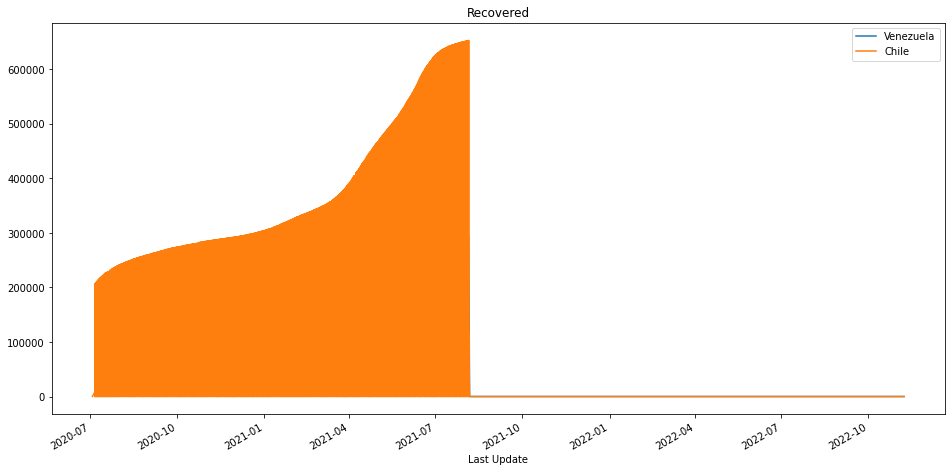

In [18]:
PlotData(df2,"Recovered","Recovered")